In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, tree
from sklearn.model_selection import train_test_split

## Load Iris Dataset

In [18]:
iris = datasets.load_iris()

## Decision Tree 

#### Split dataset into train test

In [19]:
test_size = 0.3
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=2)

#### Training

In [25]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=2)
clf = clf.fit(X_train, y_train)

In [26]:
pred = clf.predict(X_test)

In [27]:
# prediction on test set 
accuracy = round((pred == y_test).sum()/len(y_test), 2)
print(f"Accuracy Tree model is of {accuracy}, N_test={len(y_test)}")

Accuracy Tree model is of 0.98, N_test=45


In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test, pred)
print("Confusion matrix \n", cm)

Confusion matrix 
 [[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


## Feature importance of a decision Tree

Look at feature importance using the GINI importance value

In [30]:
importances = clf.feature_importances_ #GINI importance

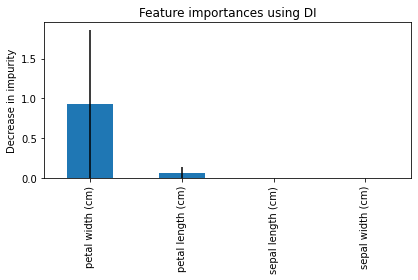

In [31]:
importances = pd.Series(importances, index=iris['feature_names'])
importances.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots()
importances.plot.bar(yerr=importances, ax=ax)
ax.set_title("Feature importances using DI")
ax.set_ylabel("Decrease in impurity")
fig.tight_layout()

In reality petal length and width are correlated ! As you can see the contribution of petal length is already reflected in petal width. Feature importance works best when variables are independent from each other.  
In another trained tree with different parameters, the feature importance could have been reversed ! Let's see that in the next section

## Feature importance Caveat

In [32]:
clf_2 = tree.DecisionTreeClassifier(max_depth=5, random_state=4)  # same model with max_depth 5 instead of 3
clf_2 = clf_2.fit(X_train, y_train)

In [33]:
pred_2 = clf_2.predict(X_test)

In [34]:
# prediction on test set 
accuracy = round((pred_2 == y_test).sum()/len(y_test), 2)
print(f"Accuracy Tree model is of {accuracy}, N_test={len(y_test)}")

Accuracy Tree model is of 0.96, N_test=45


In [35]:
print(tree.export_text(clf_2, feature_names=iris['feature_names']))

|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- class: 1
|   |--- petal width (cm) >  1.65
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [36]:
importances = clf_2.feature_importances_ #GINI importance

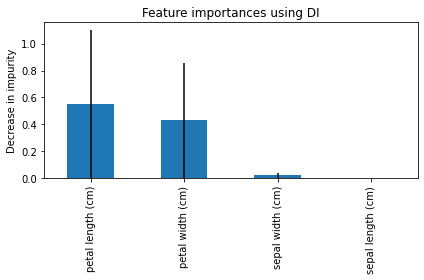

In [37]:
importances = pd.Series(importances, index=iris['feature_names'])
importances.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots()
importances.plot.bar(yerr=importances, ax=ax)
ax.set_title("Feature importances using DI")
ax.set_ylabel("Decrease in impurity")
fig.tight_layout()

A single model trained to a certain state does not necessarily capture the true feature importance ! 